#**Desafio - Treinamento Big Data Science 2022 - <font color=purple> SEMANTIX**

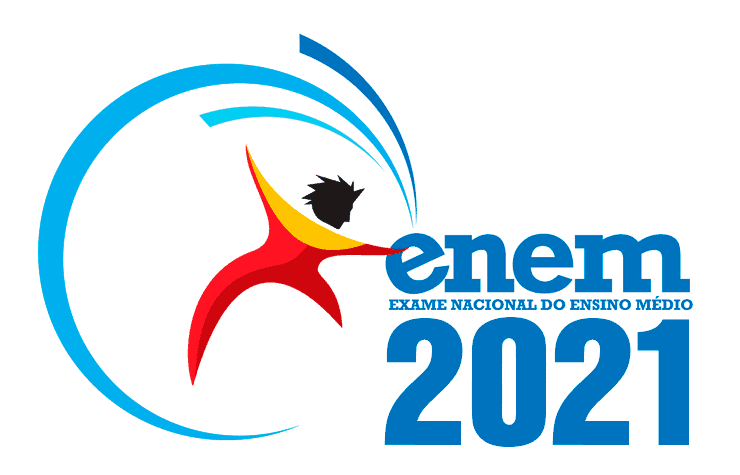

## **Introdução**

Como desafio, a <font color=purple> **SEMANTIX** <font color=black>propôs aos alunos que analisem os dados disponibilizados do Enem 2021 (https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem). 

O Exame Nacional do Ensino Médio (<font color=green>**ENEM**<font color=black>) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior. Desde 2020, o participante pode escolher entre fazer o exame impresso ou o Enem Digital, com provas aplicadas em computadores, em locais de prova definidos pelo Inep.

As notas podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superior portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais.

Com a finalidade de utilizarmos as habilidades aprendidas e desenvolvidas ao longo do treinamento.

## **Processamento**

In [1]:
# Importação das bibliotecas que usaremos no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings # para desabilitar alguns avisos chatos
warnings.filterwarnings("ignore") 
import plotly.express as px

In [2]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Abrindo o dataset
dados = pd.read_csv("/content/drive/MyDrive/Semantix-Big-Data-Science/MICRODADOS_ENEM_2021.csv", sep=';', encoding='ISO-8859-1')

# Ativando a opção de visualizar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [4]:
# Nota-se um grande número de colunas e é mister fazer uma triagem, já que há muitas informações desnecessárias 
dados.shape

(3389832, 76)

In [5]:
# Enxugando o dataframe 
dados_filtrados = dados[['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'SG_UF_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
                         'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006', 'Q025']]

# Obtenção do novo dataframe após essa podagem de colunas
dados_filtrados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025
0,5,F,1,1,1,NaN,NaN,NaN,NaN,NaN,574.6,472.6,NaN,760.0,F,F,3.0,D,B
1,12,M,1,1,1,NaN,NaN,NaN,NaN,505.9,551.8,498.3,461.5,560.0,B,B,3.0,B,A
2,13,F,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,3.0,C,B
3,3,M,1,3,2,1.0,2.0,CE,1.0,580.7,678.9,638.9,659.5,780.0,B,B,6.0,B,B
4,2,F,1,3,2,1.0,2.0,CE,1.0,497.7,532.4,457.6,582.6,780.0,D,E,4.0,C,B


In [6]:
# Após descartar algumas colunas, ficamos com 18
dados_filtrados.shape

(3389832, 19)

In [7]:
# Tipos de dados 
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TP_FAIXA_ETARIA         int64  
 1   TP_SEXO                 object 
 2   TP_ESTADO_CIVIL         int64  
 3   TP_COR_RACA             int64  
 4   TP_ESCOLA               int64  
 5   TP_ENSINO               float64
 6   TP_DEPENDENCIA_ADM_ESC  float64
 7   SG_UF_ESC               object 
 8   TP_LOCALIZACAO_ESC      float64
 9   NU_NOTA_CN              float64
 10  NU_NOTA_CH              float64
 11  NU_NOTA_LC              float64
 12  NU_NOTA_MT              float64
 13  NU_NOTA_REDACAO         float64
 14  Q001                    object 
 15  Q002                    object 
 16  Q005                    float64
 17  Q006                    object 
 18  Q025                    object 
dtypes: float64(9), int64(4), object(6)
memory usage: 491.4+ MB


In [8]:
# Números de valores únicos por features
dados_filtrados.nunique()

TP_FAIXA_ETARIA             20
TP_SEXO                      2
TP_ESTADO_CIVIL              5
TP_COR_RACA                  7
TP_ESCOLA                    3
TP_ENSINO                    2
TP_DEPENDENCIA_ADM_ESC       4
SG_UF_ESC                   27
TP_LOCALIZACAO_ESC           2
NU_NOTA_CN                5030
NU_NOTA_CH                4874
NU_NOTA_LC                4728
NU_NOTA_MT                6149
NU_NOTA_REDACAO             50
Q001                         8
Q002                         8
Q005                        20
Q006                        17
Q025                         2
dtype: int64

In [9]:
# Número de valores nulos por features
dados_filtrados.isnull().sum().sort_values(ascending=False)

TP_DEPENDENCIA_ADM_ESC    2576026
SG_UF_ESC                 2576026
TP_LOCALIZACAO_ESC        2576026
TP_ENSINO                 2293004
NU_NOTA_CN                1143988
NU_NOTA_MT                1143988
NU_NOTA_REDACAO           1011453
NU_NOTA_CH                1011453
NU_NOTA_LC                1011453
Q006                            2
Q005                            2
Q002                            2
Q001                            2
Q025                            2
TP_SEXO                         0
TP_ESCOLA                       0
TP_COR_RACA                     0
TP_ESTADO_CIVIL                 0
TP_FAIXA_ETARIA                 0
dtype: int64

In [10]:
# Pelo que foi mostrado acima há um alto número de valores nulos e isso pode influenciar na análise
dados_filtrados.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,813806.000000,813806.000000,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06,2.378379e+06,3.389830e+06
mean,5.306013e+00,1.052073e+00,2.043491e+00,1.396214e+00,1.006295e+00,2.469393,1.034867,4.917857e+02,5.199434e+02,5.025556e+02,5.350802e+02,6.135005e+02,3.739557e+00
std,3.902871e+00,4.129414e-01,1.022561e+00,5.938455e-01,7.909361e-02,0.939162,0.183443,8.056676e+01,9.579050e+01,7.916405e+01,1.106267e+02,1.907142e+02,1.378942e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000,1.000000,4.310000e+02,4.454000e+02,4.476000e+02,4.447000e+02,5.200000e+02,3.000000e+00
50%,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000,1.000000,4.820000e+02,5.219000e+02,5.059000e+02,5.154000e+02,6.000000e+02,4.000000e+00
75%,7.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,4.000000,1.000000,5.458000e+02,5.893000e+02,5.588000e+02,6.139000e+02,7.400000e+02,4.000000e+00
max,2.000000e+01,4.000000e+00,6.000000e+00,3.000000e+00,2.000000e+00,4.000000,2.000000,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02,1.000000e+03,2.000000e+01


Até agora, pelo que foi analisado, descartamos algumas colunas, haja vista a irrelevância de algumas e o fato de demandar tempo e memória.

Pelo fato de termos um alto número de null values, é interessante fazer uma limpa para dar uma maior precisão à análise.

In [11]:
# Iremos excluir as colunas com notas com valores nulos já que não contribuem com a análise 
dados_filtrados.dropna(subset = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'], inplace = True)

In [12]:
# Após essa mudança como ficou o dataset?
dados_filtrados.shape

(2238107, 19)

In [13]:
# Números de valores únicos por features
dados_filtrados.nunique()

TP_FAIXA_ETARIA             20
TP_SEXO                      2
TP_ESTADO_CIVIL              5
TP_COR_RACA                  7
TP_ESCOLA                    3
TP_ENSINO                    2
TP_DEPENDENCIA_ADM_ESC       4
SG_UF_ESC                   27
TP_LOCALIZACAO_ESC           2
NU_NOTA_CN                5028
NU_NOTA_CH                4863
NU_NOTA_LC                4726
NU_NOTA_MT                6148
NU_NOTA_REDACAO             50
Q001                         8
Q002                         8
Q005                        20
Q006                        17
Q025                         2
dtype: int64

In [14]:
# Número de valores nulos por features
dados_filtrados.isnull().sum().sort_values(ascending=False)

TP_DEPENDENCIA_ADM_ESC    1635656
SG_UF_ESC                 1635656
TP_LOCALIZACAO_ESC        1635656
TP_ENSINO                 1409111
Q025                            1
Q006                            1
Q005                            1
Q002                            1
Q001                            1
NU_NOTA_MT                      0
NU_NOTA_REDACAO                 0
TP_FAIXA_ETARIA                 0
NU_NOTA_LC                      0
NU_NOTA_CH                      0
TP_SEXO                         0
TP_ESCOLA                       0
TP_COR_RACA                     0
TP_ESTADO_CIVIL                 0
NU_NOTA_CN                      0
dtype: int64

In [15]:
dados_filtrados.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005
count,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,828996.000000,602451.000000,602451.000000,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238107e+06,2.238106e+06
mean,4.501463e+00,1.032940e+00,1.985461e+00,1.458762e+00,1.004976,2.591660,1.030650,4.919010e+02,5.231820e+02,5.048753e+02,5.351971e+02,6.225462e+02,3.778074e+00
std,3.537410e+00,3.577890e-01,1.022828e+00,6.392017e-01,0.070364,1.014603,0.172367,8.049976e+01,9.438626e+01,7.809703e+01,1.105777e+02,1.839687e+02,1.306132e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,2.000000,1.000000,4.311000e+02,4.489000e+02,4.501000e+02,4.448000e+02,5.200000e+02,3.000000e+00
50%,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000,2.000000,1.000000,4.821000e+02,5.256000e+02,5.082000e+02,5.155000e+02,6.200000e+02,4.000000e+00
75%,5.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.000000,4.000000,1.000000,5.459000e+02,5.919000e+02,5.608000e+02,6.140000e+02,7.400000e+02,4.000000e+00
max,2.000000e+01,4.000000e+00,6.000000e+00,3.000000e+00,2.000000,4.000000,2.000000,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02,1.000000e+03,2.000000e+01


## **Análise descritiva**



### **Variáveis categóricas**
Iremos iniciar a análise descritiva dos dados com as variáveis categóricas.
Em estatística, uma variável categórica é uma variável que pode assumir apenas um número limitado, e geralmente fixo, de valores possíveis, atribuindo cada indivíduo ou outra unidade de observação a um determinado grupo ou categoria nominal com base em alguma propriedade qualitativa.

###**Configuração do estilo e visualização do gráfico a ser gerado: Distribuição de alunos por sexo**

Mulheres representam 61.7% dos candidatos, contra 38.3% de homens.


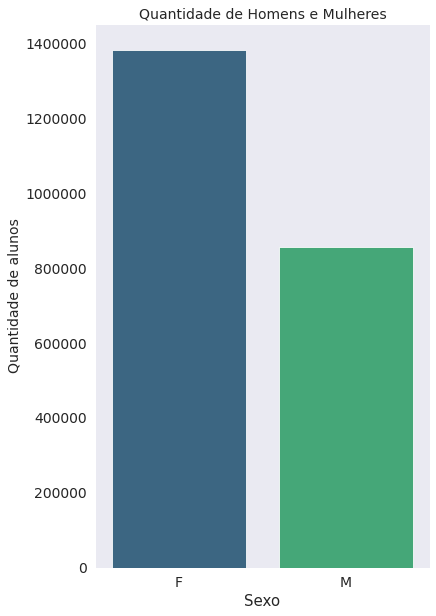

In [16]:
sns.set_style('dark')
sns.set_context('paper')
fig = plt.figure(figsize=(6,10))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.ticklabel_format(style = 'plain', axis = 'y')
ax = sns.countplot(data = dados_filtrados, x = 'TP_SEXO', order = dados_filtrados['TP_SEXO'].value_counts().index, palette = "viridis")
ax.set_title('Quantidade de Homens e Mulheres', fontsize=14)
ax.set_ylabel('Quantidade de alunos', fontsize=14) 
ax.set_xlabel('Sexo', fontsize=15)

porcentagem_mulheres = (dados_filtrados['TP_SEXO'].value_counts()[0])/(dados_filtrados['TP_SEXO'].value_counts().sum())
porcentagem_homens = (dados_filtrados['TP_SEXO'].value_counts()[1])/(dados_filtrados['TP_SEXO'].value_counts().sum())

print(f'Mulheres representam {porcentagem_mulheres*100:.1f}% dos candidatos, contra {porcentagem_homens*100:.1f}% de homens.');

###**Configuração do estilo e visualização do gráfico a ser gerado: Distribuição de alunos por Estados**

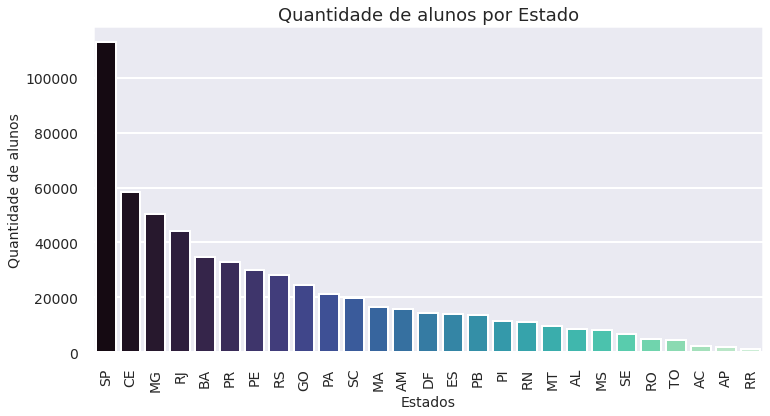

In [17]:

sns.set_style('darkgrid')
sns.set_context('poster')
fig = plt.figure(figsize=(12,6))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.xticks(rotation=90)
ax = sns.countplot(data=dados_filtrados, x ='SG_UF_ESC', order = dados_filtrados['SG_UF_ESC'].value_counts().index, palette="mako", saturation = 1)
ax.set_title('Quantidade de alunos por Estado', fontsize=18)
ax.set_xlabel('Estados', fontsize=14)
ax.set_ylabel('Quantidade de alunos', fontsize=14);

In [18]:
# Separei a quantidade de alunos de cada região e dividi pelo total de candidatos do Brasil para obter o percentual de cada uma das 5 regiões 
sudeste = dados_filtrados[(dados_filtrados['SG_UF_ESC'] == 'SP') | (dados_filtrados['SG_UF_ESC'] == 'MG') | (dados_filtrados['SG_UF_ESC'] == 'RJ') | 
                          (dados_filtrados['SG_UF_ESC'] == 'ES')]
sudeste_percentual = (sudeste.value_counts().sum()) / (dados_filtrados['SG_UF_ESC'].value_counts().sum())

In [19]:
nordeste = dados_filtrados[(dados_filtrados['SG_UF_ESC'] == 'BA') | (dados_filtrados['SG_UF_ESC'] == 'SE') | (dados_filtrados['SG_UF_ESC'] == 'AL') | 
(dados_filtrados['SG_UF_ESC'] == 'PE') | (dados_filtrados['SG_UF_ESC'] == 'PB') | (dados_filtrados['SG_UF_ESC'] == 'RN') |
                          (dados_filtrados['SG_UF_ESC'] == 'CE') | (dados_filtrados['SG_UF_ESC'] == 'PI') | (dados_filtrados['SG_UF_ESC'] == 'MA')]
nordeste_percentual = (nordeste.value_counts().sum())/(dados_filtrados['SG_UF_ESC'].value_counts().sum())

In [20]:
norte = dados_filtrados[(dados_filtrados['SG_UF_ESC'] == 'TO') | (dados_filtrados['SG_UF_ESC'] == 'AP') | (dados_filtrados['SG_UF_ESC'] == 'PA') | 
                          (dados_filtrados['SG_UF_ESC'] == 'RR') | (dados_filtrados['SG_UF_ESC'] == 'AM') | (dados_filtrados['SG_UF_ESC'] == 'RO') | 
                          (dados_filtrados['SG_UF_ESC'] == 'AC') ]
norte_percentual = (norte.value_counts().sum()) / (dados_filtrados['SG_UF_ESC'].value_counts().sum())

In [21]:
centro_oeste = dados_filtrados[(dados_filtrados['SG_UF_ESC'] == 'MG') | (dados_filtrados['SG_UF_ESC'] == 'MS') | (dados_filtrados['SG_UF_ESC'] == 'GO') |
                              (dados_filtrados['SG_UF_ESC'] == 'DF')]
centro_oeste_percentual = (centro_oeste.value_counts().sum()) / (dados_filtrados['SG_UF_ESC'].value_counts().sum())

In [22]:
sul = dados_filtrados[(dados_filtrados['SG_UF_ESC'] == 'PR') | (dados_filtrados['SG_UF_ESC'] == 'SC') | (dados_filtrados['SG_UF_ESC'] == 'RS')]
sul_percentual = (sul.value_counts().sum()) / (dados_filtrados['SG_UF_ESC'].value_counts().sum())

In [23]:
print(f'A região Sudeste representa {sudeste_percentual*100:.1f}% dos participantes do Enem.')
print(f'A região Nordeste representa {nordeste_percentual*100:.1f}% dos participantes do Enem.')
print(f'A região Norte representa {norte_percentual*100:.1f}% dos participantes do Enem.')
print(f'A região Centro-Oeste representa {centro_oeste_percentual*100:.1f}% dos participantes do Enem.')
print(f'A região Sul representa {sul_percentual*100:.1f}% dos participantes do Enem.')



A região Sudeste representa 36.3% dos participantes do Enem.
A região Nordeste representa 31.1% dos participantes do Enem.
A região Norte representa 8.4% dos participantes do Enem.
A região Centro-Oeste representa 15.9% dos participantes do Enem.
A região Sul representa 13.3% dos participantes do Enem.


###**Configuração do estilo e visualização do gráfico a ser gerado: moradores por residência**

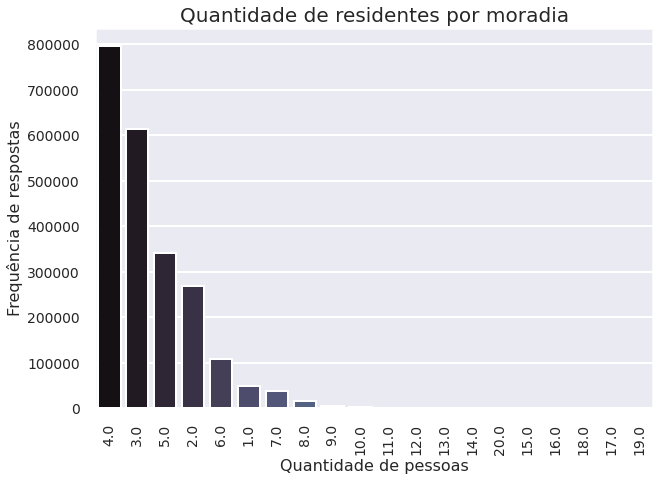

In [24]:
data_quantidade_pessoas_01a20 = dados_filtrados[dados_filtrados['Q005'] <= 20]
fig = plt.figure(figsize=(10,7))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax = sns.countplot(data = dados_filtrados, x='Q005', order = data_quantidade_pessoas_01a20['Q005'].value_counts().index, palette="mako", saturation = 0.5)
ax.set_title('Quantidade de residentes por moradia', fontsize=20)
ax.set_xlabel('Quantidade de pessoas', fontsize=16)
ax.set_ylabel('Frequência de respostas', fontsize=16)  
ax.ticklabel_format(style='plain', axis='y') 
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);


**Pelo gráfico percebe-se que a grande maioria dos lares possuem de três a quatro moradores por residência.**

###**Configuração do estilo e visualização do gráfico a ser gerado: renda por família**

In [25]:
# Criação de um dicionário para fazer a legenda do gráfico
dicionario_da_renda = {'A':'Nenhuma renda',
                    'B':'Até 1.100,00',
                   'C':'De 1.100,01 até 1.650,00.',
                   'D':'De 1.650,01 até 2.200,00.',
                   'E':'De 2.200,01 até 2.750,00.',
                   'F':'De 2.750,01 até 3.300,00.',
                   'G':'De 3.300,01 até 4.400,00.',
                   'H':'De 4.400,01 até 5.500,00.',
                    'I':'De 5.500,01 até 6.600,00.',
                    'J':'De 6.600,01 até 7.700,00.',
                    'K':'De 7.700,01 até 8.800,00.',
                    'L':'De 8.800,01 até 9.900,00.',
                    'M':'De 9.900,01 até 11.000,00.',
                    'N':'De 11.000,01 até 13.200,00.',
                    'O':'De 13.200,01 até 16.500,00.',
                    'P':'De 16.500,01 até 22.000,00.',
                    'Q':'Acima de 22.000,00.'}

#Transformando o dicinário para o formato texto, para podermos usar no gráfico propriamente.
dicionario_legenda_renda = ''
for key,value in dicionario_da_renda.items():
    dicionario_legenda_renda = dicionario_legenda_renda + "{key}: {value}\n".format(key=key, value=value)

As respostas B, C e D correspondem a 52.3 %, ou seja, a mais da metade da da frequência de respostas.


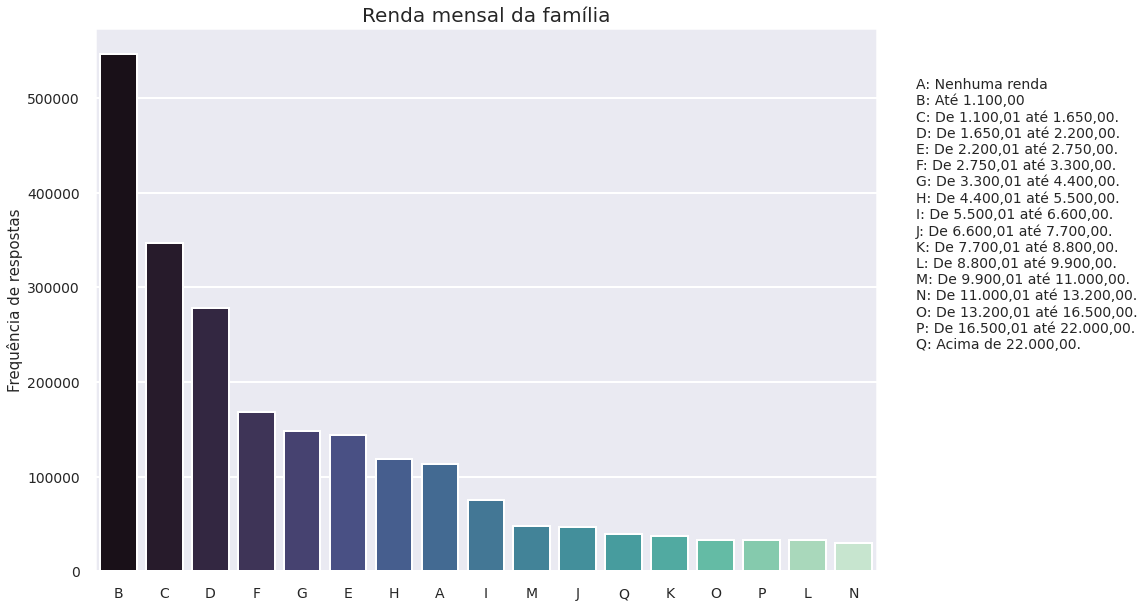

In [26]:
fig = plt.figure(figsize=(14,10))
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax = sns.countplot(data = dados_filtrados, x='Q006', order=dados_filtrados['Q006'].value_counts().index,palette='mako')
ax.set_title('Renda mensal da família', fontsize=20)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequência de respostas', fontsize=15)    
ax.text(1.05,0.38, dicionario_legenda_renda, transform=ax.transAxes, fontsize=14)
soma = (dados_filtrados['Q006'].value_counts()[['B','C', 'D']].sum())/(dados_filtrados['Q006'].value_counts().sum())


print(f'As respostas B, C e D correspondem a {soma*100:.1f} %, ou seja, a mais da metade da da frequência de respostas.')

**Percebe-se que mais da metade da das famílias de candidatos do ENEM vivem com até dois salários mínimos**

###**Configuração do estilo e visualização do gráfico a ser gerado: tipo de escola**

**Segundo o dicionário os possíveis valores são: 1 para Não respondeu, 2 para escola pública, 3 para escola privada**


In [27]:
# Filtrando os dados para análise de informações
dados_filtrados = dados_filtrados[dados_filtrados['TP_ESCOLA'] > 1]

# Dicionário para os dados
tipo_escola = {2:'Pública', 3:'Privada'}

# Iteração do dataset para inserir o tipo de escola 
dados_filtrados['TP_ESCOLA'] = [tipo_escola[resp] for resp in dados_filtrados['TP_ESCOLA']]

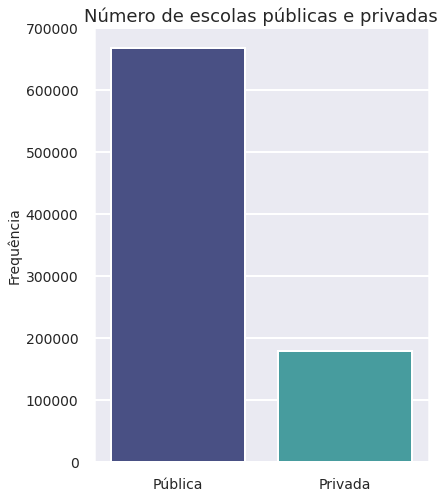

In [28]:
fig = plt.figure(figsize=(6,8))
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14   
ax = sns.countplot(data = dados_filtrados, x='TP_ESCOLA', order = dados_filtrados['TP_ESCOLA'].value_counts().index, palette='mako')
ax.set_title('Número de escolas públicas e privadas', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Frequência', fontsize=14);

###**Configuração do estilo e visualização do gráfico a ser gerado: internet em casa**

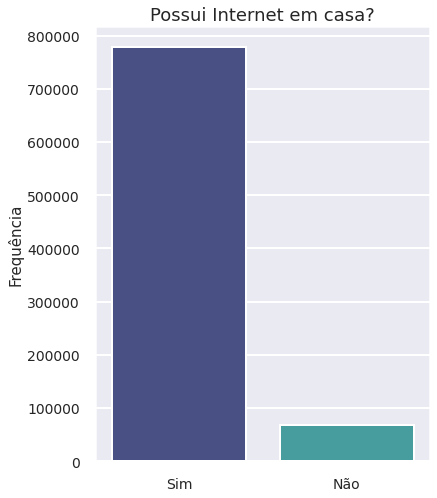

In [29]:
# Dicionário para os dados
dicionario_internet = {'A':'Não', 'B':'Sim'}

# Iteração do dataset para inserir o tipo de resposta
dados_filtrados['Q025'] = [dicionario_internet[resp] for resp in dados_filtrados['Q025']]
fig = plt.figure(figsize=(6,8))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.ticklabel_format(style='plain', axis='y') 
ax = sns.countplot(data = dados_filtrados, x='Q025', order = dados_filtrados['Q025'].value_counts().index, palette = 'mako')
ax.set_title('Possui Internet em casa?', fontsize=18)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15);

In [30]:
tem_internet = (dados_filtrados['Q025'].value_counts()[['Sim']].sum())/(dados_filtrados['Q025'].value_counts().sum())
print(f'Dos alunos inscritos no ENEM o percentual de {tem_internet*100:.1f}% possuem internet em casa.')

Dos alunos inscritos no ENEM o percentual de 91.9% possuem internet em casa.


### **Variáveis quantitativas**
São aquelas cujos valores são expressos em números. As variáveis quantitativas se subdividem, ainda, em: o Variáveis quantitativas discretas – quando resultam de um conjunto finito (ou enumerável) de valores possíveis.


##**Configuração do estilo e visualização do gráfico a ser gerado: notas dos alunos**

In [31]:
# Cálculo da nota geral do aluno, sem levar em conta pesos e outras variáveis
dados_filtrados['Nota_Geral'] = (dados_filtrados['NU_NOTA_MT']  + dados_filtrados['NU_NOTA_REDACAO'] + dados_filtrados['NU_NOTA_CH'] 
                               + dados_filtrados['NU_NOTA_CN'] + dados_filtrados['NU_NOTA_LC'])/5

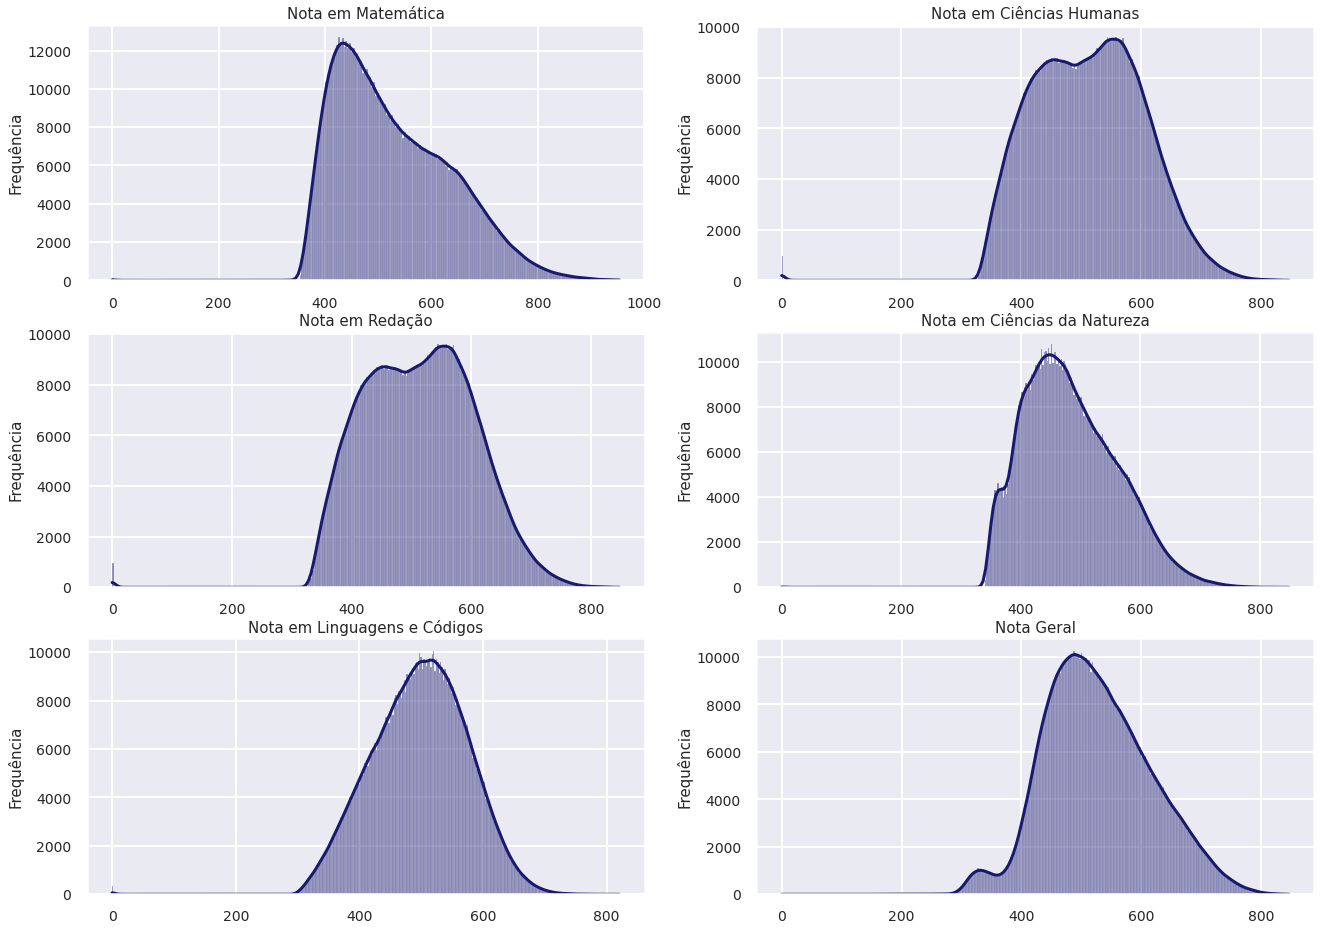

In [32]:
fig, axes = plt.subplots(3,2,figsize=(22,16))
plt.ticklabel_format(style='plain', axis='y')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mat = sns.histplot(ax=axes[0,0], data = dados_filtrados, x = 'NU_NOTA_MT', kde = True, palette = 'mako', color = 'midnightblue')
mat.set_title("Nota em Matemática", fontsize=15)
mat.set_xlabel('')
mat.set_ylabel('Frequência', fontsize=15)  

humanas = sns.histplot(ax=axes[0,1], data = dados_filtrados, x='NU_NOTA_CH', kde = True, palette = 'mako', color = 'midnightblue')
humanas.set_title("Nota em Ciências Humanas", fontsize=15)
humanas.set_xlabel('')
humanas.set_ylabel('Frequência', fontsize=15)  

redacao = sns.histplot(ax = axes[1,0], data = dados_filtrados, x = 'NU_NOTA_CH', kde = True, palette = 'mako', color = 'midnightblue')
redacao.set_title("Nota em Redação", fontsize=15)
redacao.set_xlabel('')
redacao.set_ylabel('Frequência', fontsize=15)  

natureza = sns.histplot(ax=axes[1,1],data = dados_filtrados, x='NU_NOTA_CN', kde = True, palette = 'mako', color = 'midnightblue')
natureza.set_title("Nota em Ciências da Natureza", fontsize=15)
natureza.set_xlabel('')
natureza.set_ylabel('Frequência', fontsize=15)  

linguagens_e_codigos = sns.histplot(ax=axes[2,0], data=dados_filtrados, x='NU_NOTA_LC', kde = True, palette = 'mako', color = 'midnightblue')
linguagens_e_codigos.set_title("Nota em Linguagens e Códigos", fontsize=15)
linguagens_e_codigos.set_xlabel('')
linguagens_e_codigos.set_ylabel('Frequência', fontsize=15)  

geral = sns.histplot(ax=axes[2,1], data = dados_filtrados, x = 'Nota_Geral', kde=True, palette = 'mako', color = 'midnightblue')
geral.set_title("Nota Geral", fontsize=15)
geral.set_xlabel('')
geral.set_ylabel('Frequência', fontsize=15);

Ao analisar os gráficos das notas de cada disciplina e a nota geral. Podemos notar uma certa aproximação de uma distribuição normal em alguns dos gráficos. Me chamou a atenção o gráfico das notas de matemática, o qual nos oferece uma assimetria a direita, o que não é uma surpresa, haja vista o baixo desempenho educacional do Brasil na disciplina, como exemplo os dados do **Programa Internacional de Avaliação de Estudantes** (**PISA**), uma vez que o Brasil ocupa a 54° colocação. [Aqui](https://www.cnnbrasil.com.br/nacional/educacao-brasileira-esta-em-ultimo-lugar-em-ranking-de-competitividade/#:~:text=O%20pa%C3%ADs%20teve%20um%20baixo,de%20apenas%202%2C6%25.). 

In [33]:
dados_filtrados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,SG_UF_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q025,Nota_Geral
3,3,M,1,3,Pública,1.0,2.0,CE,1.0,580.7,678.9,638.9,659.5,780.0,B,B,6.0,B,Sim,667.60
4,2,F,1,3,Pública,1.0,2.0,CE,1.0,497.7,532.4,457.6,582.6,780.0,D,E,4.0,C,Sim,570.06
8,8,F,1,3,Pública,NaN,NaN,NaN,NaN,487.4,476.5,450.7,493.4,520.0,B,B,2.0,B,Sim,485.60
9,4,F,1,3,Pública,1.0,NaN,NaN,NaN,507.6,539.2,494.6,413.3,380.0,D,D,2.0,B,Sim,466.94
11,2,F,1,1,Pública,1.0,NaN,NaN,NaN,378.5,502.7,487.7,514.9,680.0,D,D,4.0,B,Sim,512.76


In [34]:
dados_boxplot = dados_filtrados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Nota_Geral']]

# Vamos renomear o nome das colunas selecionadas anteriormente
dados_boxplot.columns = ['Ciências da natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação', 'Nota_Geral']
dados_boxplot.describe().applymap(lambda x: f"{x:0.2f}") # O applymap retira a notação científica e visualiza melhor os dados

,Ciências da natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Nota_Geral
count,847397.00,847397.00,847397.00,847397.00,847397.00,847397.00
mean,484.17,513.07,498.15,529.69,615.04,528.02
std,77.90,90.80,76.14,107.63,189.22,88.46
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,424.90,441.90,444.80,441.90,520.00,464.96
50%,474.30,513.10,500.70,509.10,600.00,519.92
75%,536.70,579.40,552.20,605.70,740.00,586.74
max,848.70,846.90,820.50,953.10,1000.00,846.10


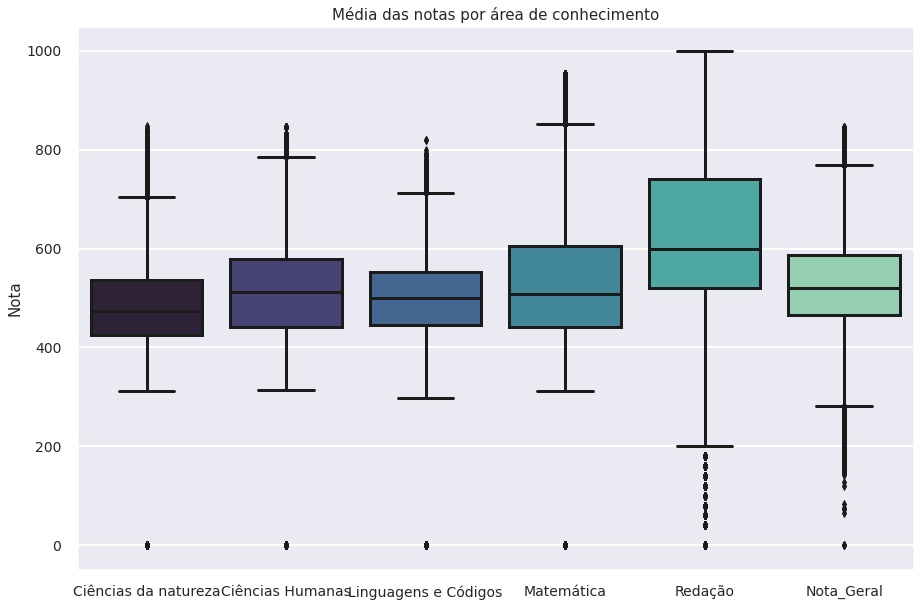

In [35]:
dados_boxplot = pd.melt(dados_boxplot)
fig = plt.figure(figsize=(15,10))
ax = sns.boxplot(x = 'variable', y = 'value', data = dados_boxplot, palette = 'mako')
ax.set_title('Média das notas por área de conhecimento', fontsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Nota', fontsize=15); 

As notas de redação possuem maiores oscilações.

In [36]:
dados_filtrados.dropna(subset = ['SG_UF_ESC'], inplace = True)

##**Valor das médias das notas por estado e regiões**

In [37]:
# Criação de um dicionário para as regiões
dicionario_regioes = {'SP':'Sudeste','MG':'Sudeste','RJ':'Sudeste', 'ES':'Sudeste', 'BA':'Nordeste', 'CE':'Nordeste', 'PE':'Nordeste', 'MA':'Nordeste', 'PB':'Nordeste', 'PI':'Nordeste', 'RN':'Nordeste', 'AL':'Nordeste', 'SE':'Nordeste',
    'PA': 'Norte', 'AM': 'Norte', 'RO': 'Norte', 'TO': 'Norte', 'AP': 'Norte', 'AC': 'Norte','RR': 'Norte',
    'RS': 'Sul', 'PR': 'Sul', 'SC': 'Sul',
    'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste'}

# Iteração com o dataframe e criação uma nova coluna com a informação de "Região"
dados_filtrados['REGIAO'] = [dicionario_regioes[resp] for resp in dados_filtrados.SG_UF_ESC]


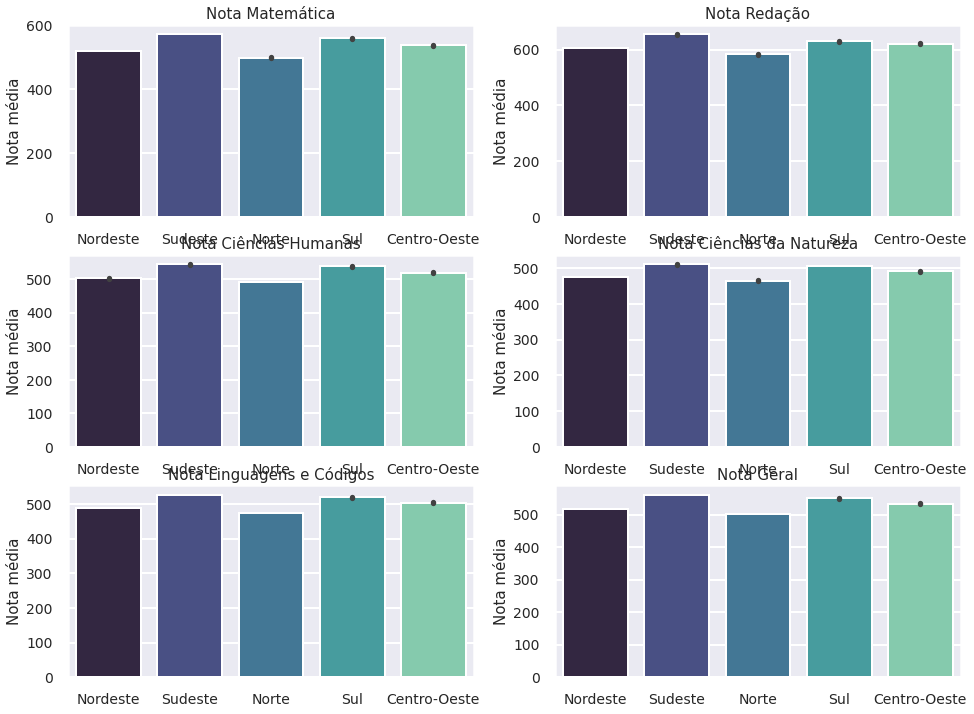

In [38]:
fig, axes = plt.subplots(3,2,figsize=(16,12))
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.ticklabel_format(style='plain', axis='y') #retirando a notação científica

#Gerando o gráfico
matematica = sns.barplot( ax  =axes[0,0], data = dados_filtrados, y='NU_NOTA_MT', x='REGIAO', palette = 'mako')
matematica.set_title("Nota Matemática", fontsize=15)
matematica.set_xlabel('')
matematica.set_ylabel('Nota média', fontsize=15)  

redacao = sns.barplot(ax=axes[0,1], data=dados_filtrados, y='NU_NOTA_REDACAO', x='REGIAO', palette = 'mako')
redacao.set_title("Nota Redação", fontsize=15)
redacao.set_xlabel('')
redacao.set_ylabel('Nota média', fontsize=15)  

humanas = sns.barplot(ax=axes[1,0], data=dados_filtrados, y='NU_NOTA_CH', x='REGIAO', palette = 'mako')
humanas.set_title("Nota Ciências Humanas", fontsize=15)
humanas.set_xlabel('')
humanas.set_ylabel('Nota média', fontsize=15)  

natureza = sns.barplot(ax=axes[1,1], data = dados_filtrados,  y='NU_NOTA_CN', x='REGIAO', palette = 'mako')
natureza.set_title("Nota Ciências da Natureza", fontsize=15)
natureza.set_xlabel('')
natureza.set_ylabel('Nota média', fontsize=15)  

linguagens = sns.barplot(ax=axes[2,0], data=dados_filtrados, y='NU_NOTA_LC', x='REGIAO', palette = 'mako')
linguagens.set_title("Nota Linguagens e Códigos", fontsize=15)
linguagens.set_xlabel('')
linguagens.set_ylabel('Nota média', fontsize=15)  

geral = sns.barplot(ax=axes[2,1], data = dados_filtrados, y='Nota_Geral', x='REGIAO', palette = 'mako')
geral.set_title("Nota Geral", fontsize=15)
geral.set_xlabel('')
geral.set_ylabel('Nota média', fontsize=15);

##**Configuração do estilo e visualização do gráfico a ser gerado: a renda familiar influencia na nota?**

In [39]:
dados_filtrados['REGIAO'] = [dicionario_regioes[resp] for resp in dados_filtrados.SG_UF_ESC]

In [40]:
dicionario_da_renda
dados_matematica = dados_filtrados[['NU_NOTA_MT','Q006','Q002','REGIAO']]
dados_natureza = dados_filtrados[['NU_NOTA_CN','Q006','Q002','REGIAO']]
dados_humanas = dados_filtrados[['NU_NOTA_CH','Q006','Q002','REGIAO']]
dados_linguagens = dados_filtrados[['NU_NOTA_LC','Q006','Q002','REGIAO']]
dados_redacao = dados_filtrados[['NU_NOTA_REDACAO','Q002', 'Q006','REGIAO']]
dados_geral = dados_filtrados[['Nota_Geral','Q006','Q002','REGIAO']]

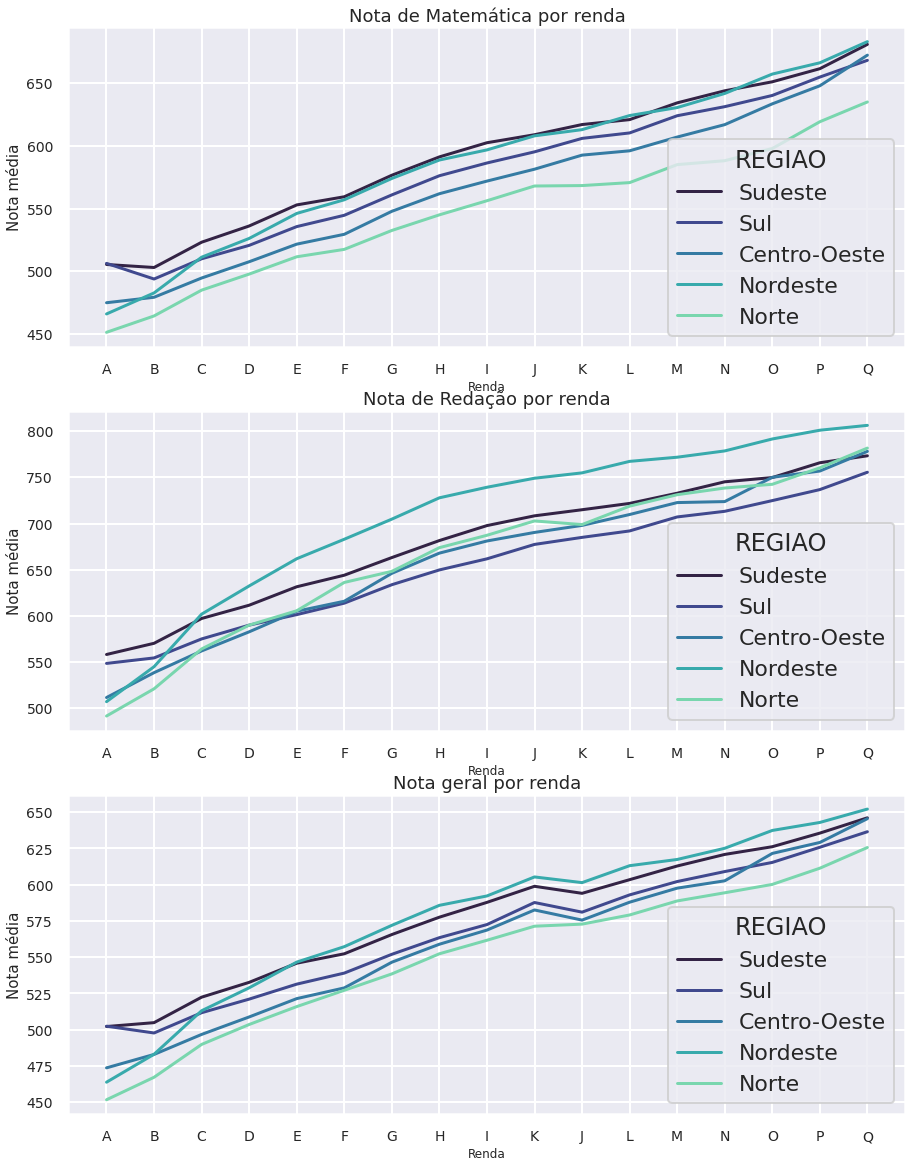

In [41]:
fig, axes = plt.subplots(3,1,figsize=(15,20))
mat = dados_matematica.groupby(['Q006', 'REGIAO'])\
    .mean().sort_values(by='NU_NOTA_MT', ascending=True)

red = dados_redacao.groupby(['Q006', 'REGIAO'])\
    .mean().sort_values(by='NU_NOTA_REDACAO', ascending=True)

geral = dados_geral.groupby(['Q006', 'REGIAO'])\
    .mean().sort_values(by='Nota_Geral', ascending=True)
ax1 = sns.lineplot(ax=axes[0], x='Q006', y='NU_NOTA_MT', data = mat, hue='REGIAO', hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'], ci=None, palette = 'mako')
ax1.set_title('Nota de Matemática por renda', fontsize=18)
ax1.set_xlabel('Renda', fontsize=12)
ax1.set_ylabel('Nota média', fontsize=15) 

ax2 = sns.lineplot(ax=axes[1], x='Q006', y='NU_NOTA_REDACAO', data = red, hue='REGIAO', hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'], ci=None, palette = 'mako')
ax2.set_title('Nota de Redação por renda', fontsize=18)
ax2.set_xlabel('Renda', fontsize=12)
ax2.set_ylabel('Nota média', fontsize=15) 

ax3 = sns.lineplot(ax=axes[2], x='Q006', y='Nota_Geral', data = geral, hue='REGIAO', hue_order=['Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste', 'Norte'], ci=None, palette = 'mako')
ax3.set_title('Nota geral por renda', fontsize=18)
ax3.set_xlabel('Renda', fontsize=12)
ax3.set_ylabel('Nota média', fontsize=15); 


Após analisar esse gráfico podemos notar a importância da renda para a questão do aproveitamento do aluno(a). Quanto maior a renda, maior é o aproveitamento do candidato, ou seja, há uma correlação positiva entre essas duas variáveis. 

##**Correlação**

###**Matriz de correlação**

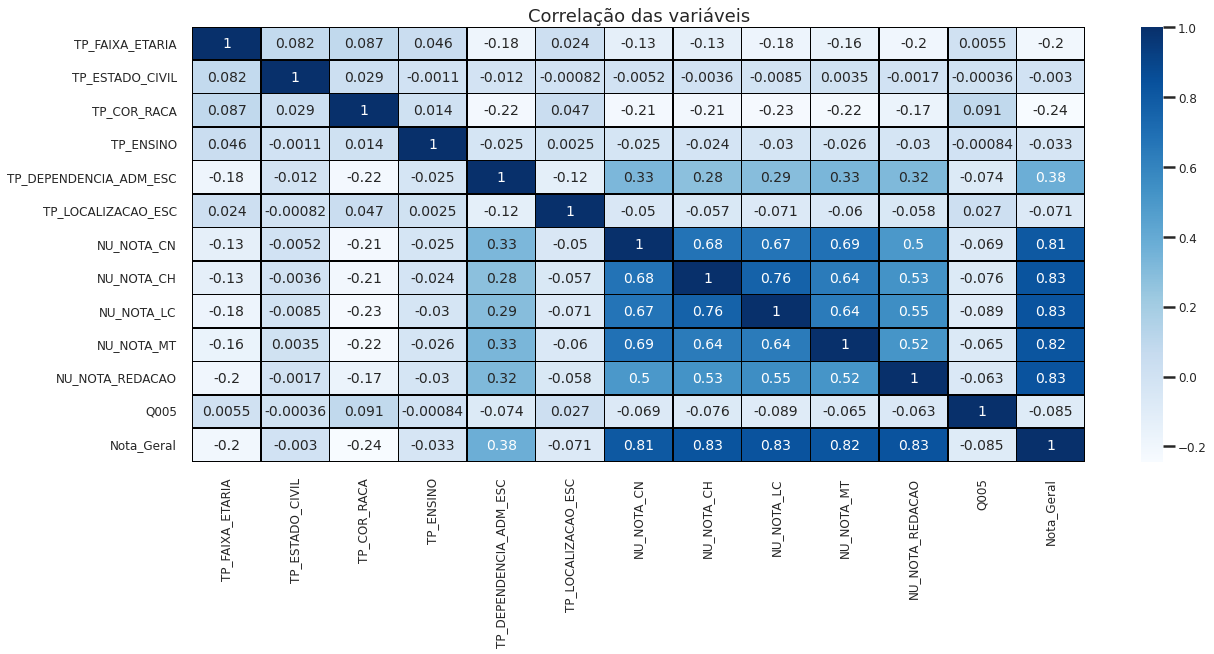

In [42]:
# Criando a matriz de correlação
correlacao = dados_filtrados.corr()
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.figure(figsize=(20,8))
sns.color_palette("mako", as_cmap=True)
ax =sns.heatmap(correlacao, annot=True, linewidths=0.5, cmap='Blues', linecolor='black', annot_kws={'size': 14})
ax.set_title('Correlação das variáveis', fontsize=18);

In [43]:
# Salvar o DataFrame tratado
dados_filtrados.to_csv('dados_filtrados.csv', index=False, sep=';', encoding='ISO-8859-1')